In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.stats as pearsonr
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.impute import KNNImputer

In [2]:
main_df = pd.read_csv(r"C:\Users\elodi\Documents\DATA\Data Analyst\Projets\Projet 5\main_df.csv")

In [3]:
main_df = (
            main_df
                .copy()
                .set_index('Pays')
)
main_df.head()

,%Evolution_pop_2010/2019,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité protéines(g/personne/jour),%Protéines_animales,PIB/habitants_US$,Importations_1000_tonnes
Pays,,,,,,
Arménie,2.82,3019.0,94.28,56.0,13653.8,43.0
Afghanistan,30.34,2271.0,57.29,18.0,2065.0,44.0
Albanie,-2.27,3334.0,115.98,54.0,13671.5,22.0
Algérie,19.67,3490.0,90.82,27.0,11510.6,0.0
Angola,36.26,2441.0,52.07,30.0,6670.3,278.0


In [4]:
print(main_df.isnull().sum())

%Evolution_pop_2010/2019                          2
Disponibilité alimentaire (Kcal/personne/jour)    0
Disponibilité protéines(g/personne/jour)          0
%Protéines_animales                               0
PIB/habitants_US$                                 7
Importations_1000_tonnes                          1
dtype: int64


### 1. Imputation des données manquantes avec KNN Imputer

In [5]:
X = main_df.values
Y = main_df.index
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
imputed = imputer.fit_transform(X)
main_df = pd.DataFrame(imputed, Y, columns=main_df.columns)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, Arménie to Chine
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   %Evolution_pop_2010/2019                        175 non-null    float64
 1   Disponibilité alimentaire (Kcal/personne/jour)  175 non-null    float64
 2   Disponibilité protéines(g/personne/jour)        175 non-null    float64
 3   %Protéines_animales                             175 non-null    float64
 4   PIB/habitants_US$                               175 non-null    float64
 5   Importations_1000_tonnes                        175 non-null    float64
dtypes: float64(6)
memory usage: 9.6+ KB


### 2. Classification hiérarchique 

In [6]:
def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
)

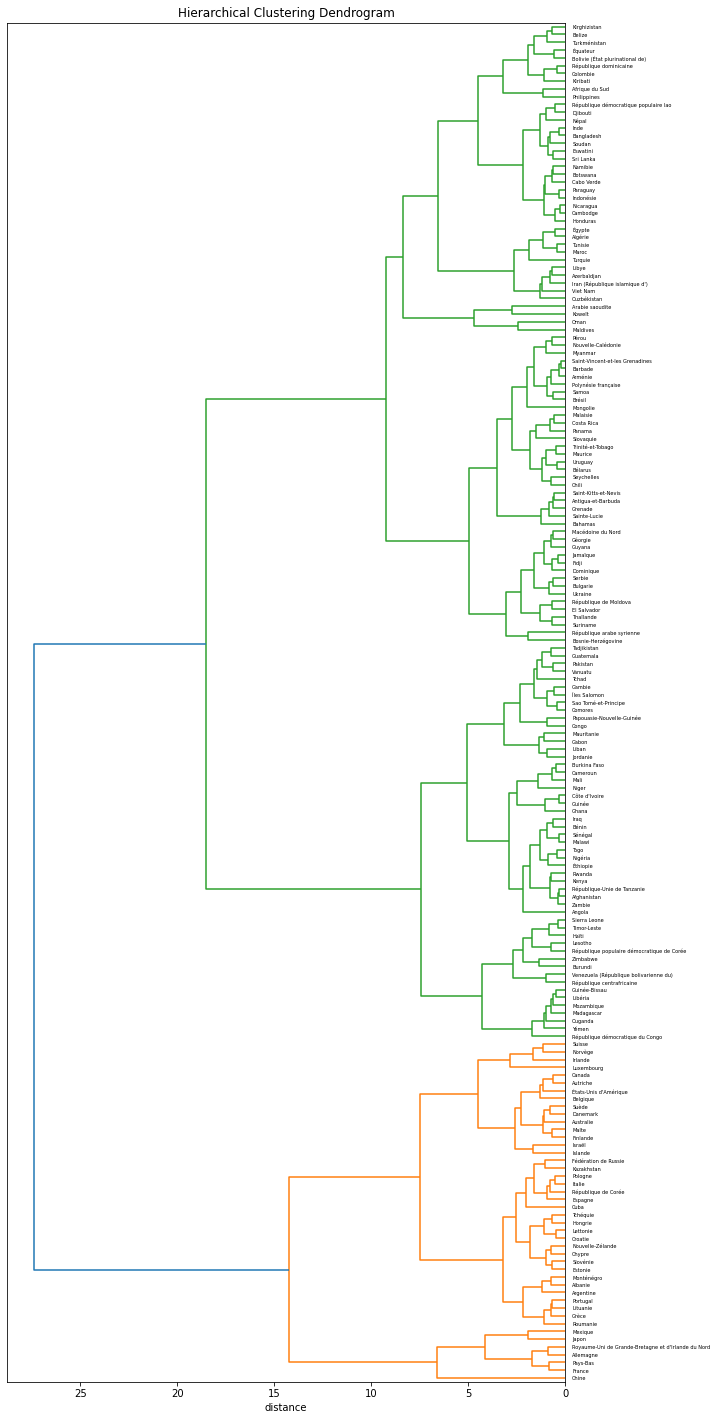

In [7]:
# Préparation des données pour le clustering
X = main_df.values
names = main_df.index

# Centrage et réduction 
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique 
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

# Visualisation 
plt.savefig("Dendrogram.png")
plot_dendrogram(Z, names)

# 
Découpage du dendrogramme en 5 groupes afin d'avoir une première idée du partitionnement

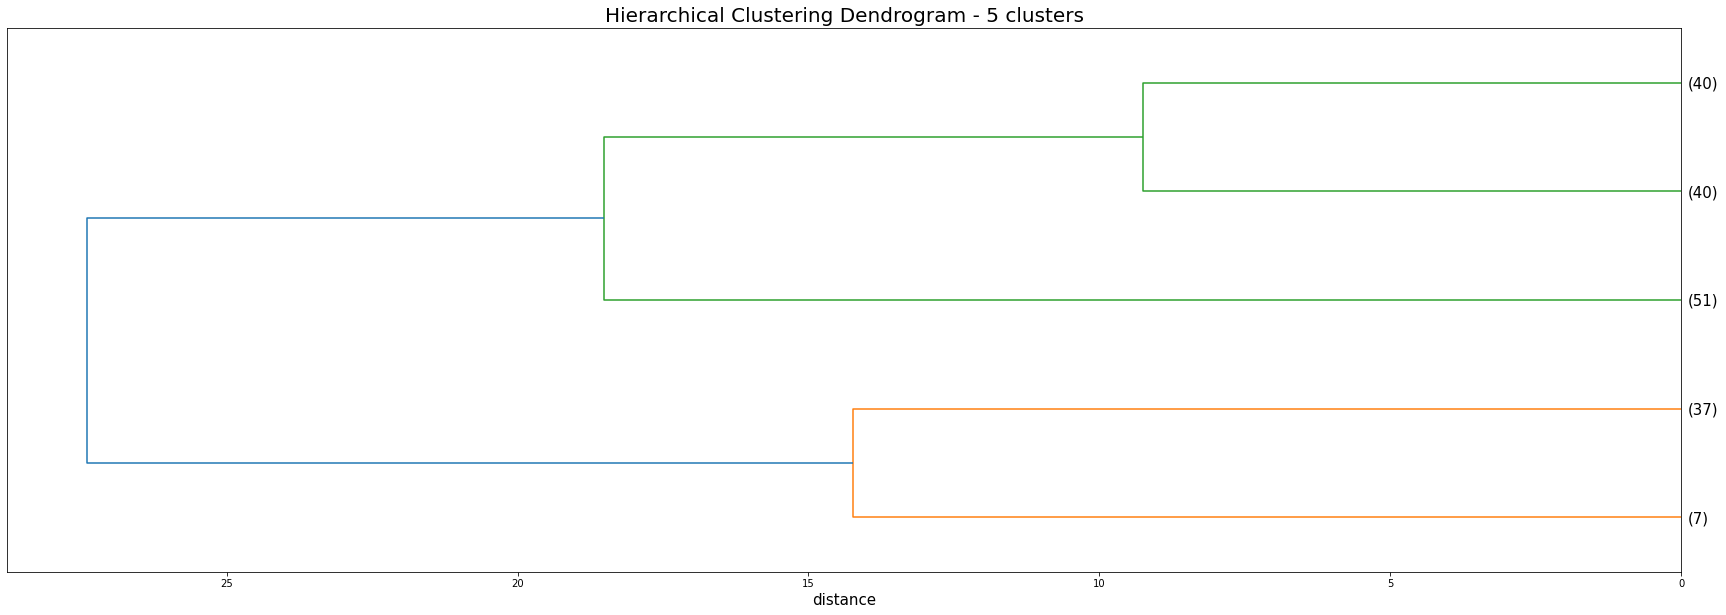

In [8]:
fig = plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering Dendrogram - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)

dendrogram(Z, labels = names, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

# 
Aperçu des 5 groupes et création d'une nouvelle colonnes pour les 5 clusters

In [9]:
main_df['Cluster']= fcluster(Z, 5, criterion='maxclust', depth=2, R=None, monocrit=None)

In [10]:
clusters=[]
for i in range(1, 6):
    print(f"Cluster {i}:")
    print(main_df[main_df['Cluster']==i].index)
    print(" ")

Cluster 1:
Index(['France', 'Allemagne', 'Japon', 'Mexique', 'Pays-Bas',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord', 'Chine'],
      dtype='object', name='Pays')
 
Cluster 2:
Index(['Albanie', 'Argentine', 'Australie', 'Autriche', 'Canada', 'Cuba',
       'Chypre', 'Danemark', 'Estonie', 'Finlande', 'Grèce', 'Hongrie',
       'Croatie', 'Islande', 'Irlande', 'Israël', 'Italie', 'Kazakhstan',
       'République de Corée', 'Lettonie', 'Lituanie', 'Malte',
       'Nouvelle-Zélande', 'Norvège', 'Tchéquie', 'Pologne', 'Portugal',
       'Roumanie', 'Fédération de Russie', 'Slovénie', 'Espagne', 'Suède',
       'Suisse', 'États-Unis d'Amérique', 'Belgique', 'Luxembourg',
       'Monténégro'],
      dtype='object', name='Pays')
 
Cluster 3:
Index(['Afghanistan', 'Angola', 'Îles Salomon', 'Burundi', 'Cameroun',
       'République centrafricaine', 'Tchad', 'Comores', 'Congo', 'Bénin',
       'Gabon', 'Gambie', 'Ghana', 'Guatemala', 'Guinée', 'Haïti', 'Iraq',
       'Côte d'Ivo

In [11]:
pd.DataFrame(main_df['Cluster']).to_csv('pays_clusters.csv')

### 3. Comparaison visuelle des groupes  (boxplots et nuages de points)
    a.Boxplots

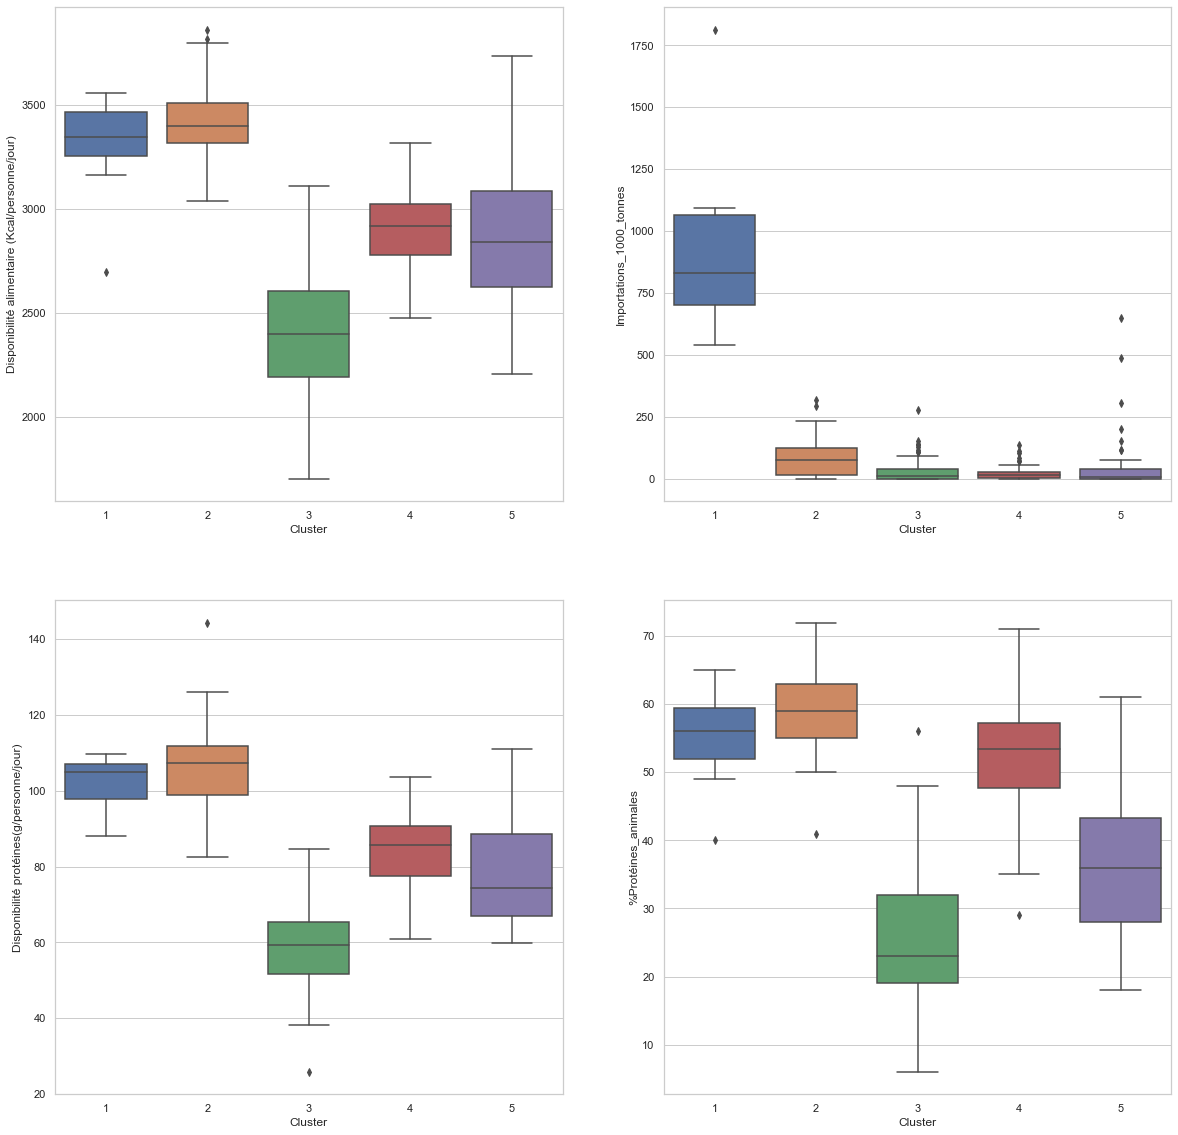

In [12]:
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")


plt.subplot(221)
sns.boxplot(data=main_df, x='Cluster', y='Disponibilité alimentaire (Kcal/personne/jour)')

plt.subplot(222)
sns.boxplot(data=main_df, x='Cluster', y='Importations_1000_tonnes')

plt.subplot(223)
sns.boxplot(data=main_df, x='Cluster', y='Disponibilité protéines(g/personne/jour)')

plt.subplot(224)
sns.boxplot(data=main_df, x='Cluster', y='%Protéines_animales')

plt.show(block=False)

<AxesSubplot:xlabel='Cluster', ylabel='PIB/habitants_US$'>

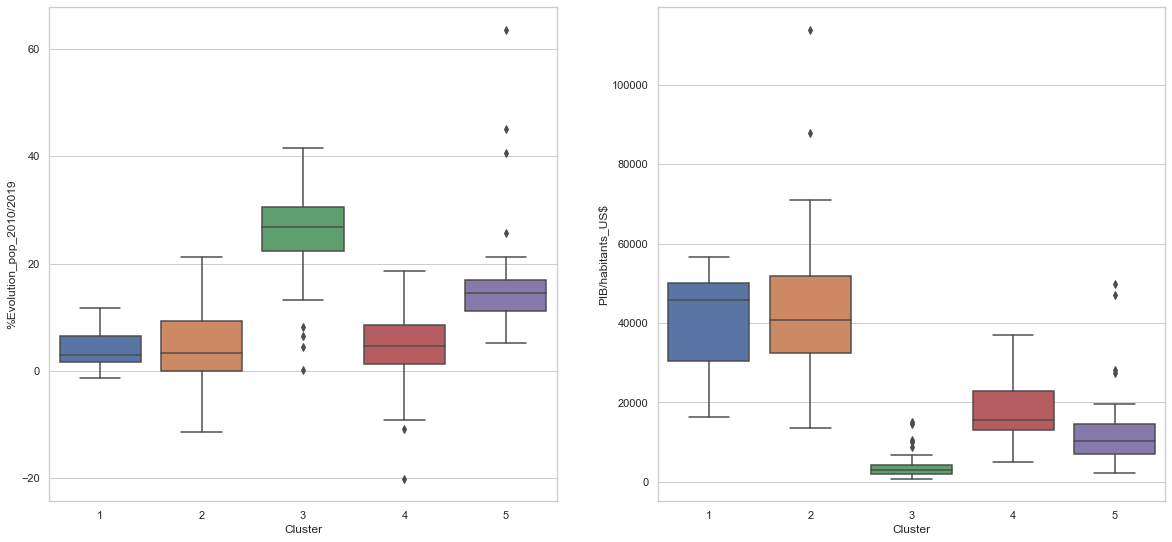

In [13]:
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=main_df, x='Cluster', y='%Evolution_pop_2010/2019')

plt.subplot(222)
sns.boxplot(data=main_df, x='Cluster', y='PIB/habitants_US$')

# 
    b.Nuages de points

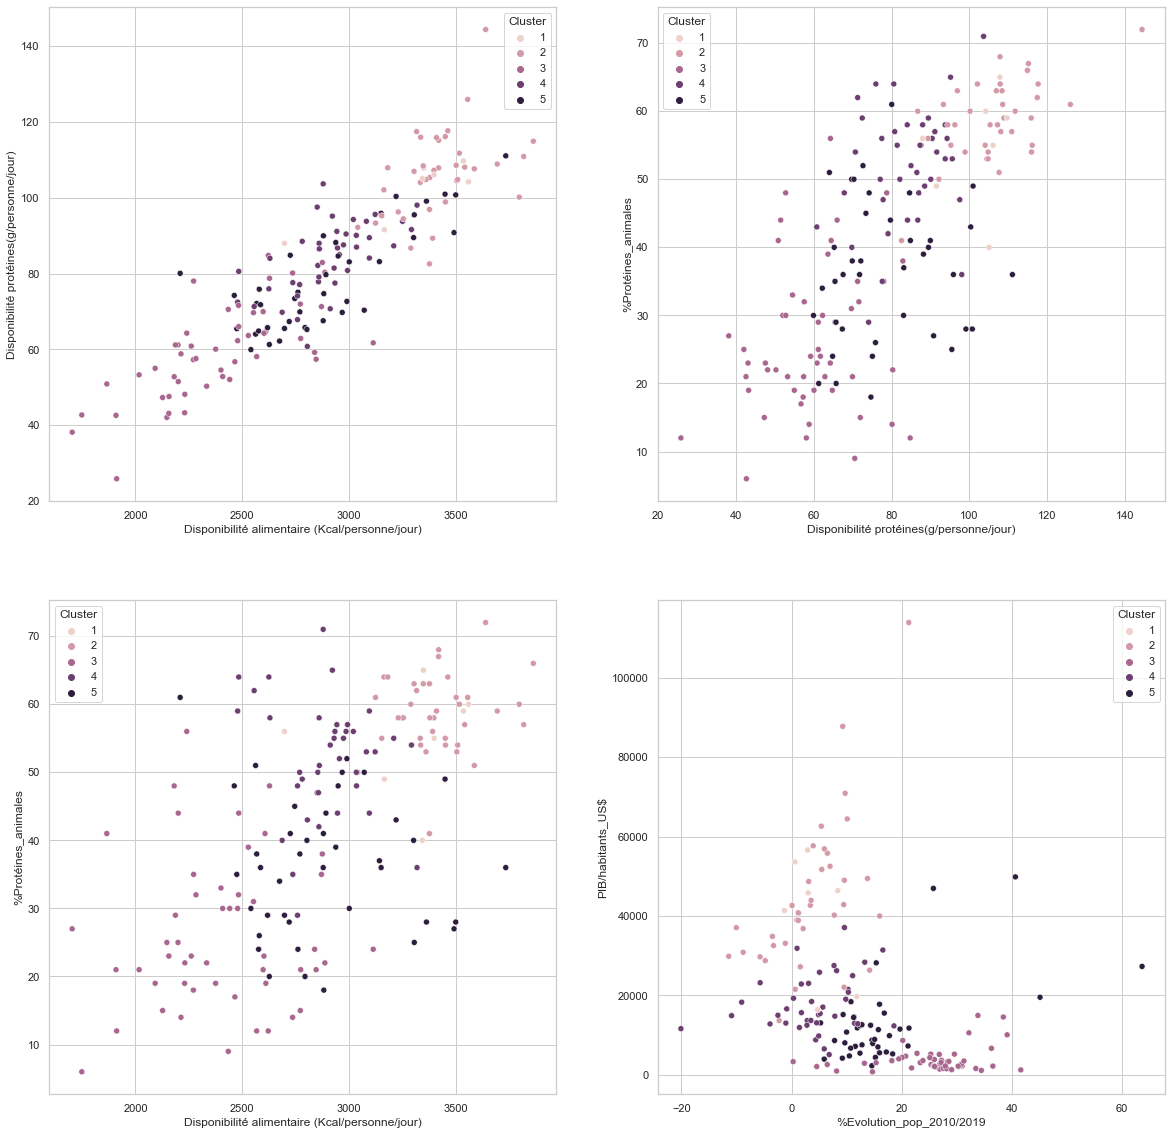

In [14]:
plt.figure(figsize=(20, 20))
plt.subplot(221)
sns.scatterplot(x='Disponibilité alimentaire (Kcal/personne/jour)',
                    y='Disponibilité protéines(g/personne/jour)',
                    hue='Cluster',
                    data=main_df)
plt.subplot(222)
sns.scatterplot(x='Disponibilité protéines(g/personne/jour)',
                    y='%Protéines_animales',
                    hue='Cluster',
                    data=main_df)

plt.subplot(223)
sns.scatterplot(x='Disponibilité alimentaire (Kcal/personne/jour)',
                    y='%Protéines_animales',
                    hue='Cluster',
                    data=main_df)

plt.subplot(224)
sns.scatterplot(x='%Evolution_pop_2010/2019',
                    y='PIB/habitants_US$',
                    hue='Cluster',
                    data=main_df)

plt.show()

# 
Comparaison des moyennes de chaques variables 

In [15]:
df_cluster_cah = main_df.groupby('Cluster').mean()
df_cluster_cah

,%Evolution_pop_2010/2019,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité protéines(g/personne/jour),%Protéines_animales,PIB/habitants_US$,Importations_1000_tonnes
Cluster,,,,,,
1,4.302857,3291.285714,101.788571,54.857143,39993.142857,959.000000
2,3.584865,3417.270270,106.209189,58.756757,44266.401622,84.648649
3,25.526667,2390.509804,59.358627,25.960784,3749.859608,35.949020
4,4.042000,2902.450000,84.171500,52.100000,17873.389000,27.200000
5,16.492250,2889.100000,78.319750,36.350000,12619.792500,61.425000


#### Première sélection des pays suite CAH 
Pour l'exportation des poulets, les pays les plus intéressants doivent posséder les caractéristiques suivantes :
- Une disponibilité alimentaire élévée.
- Un ratio de protéines animales/protéines totales élevé.
- Fort taux importation.

Les graphiques ci-dessus ainsi que les moyennes des variables nous indiquent que les pays des groupes 1 et 2 correspondent à ces indicateurs.

# 
Liste des pays identifiés comme potentiellement intéressants suite CAH

In [16]:
cluster_1 = main_df[main_df['Cluster'] == 1]
cluster_2 = main_df[main_df['Cluster'] == 2]
print(cluster_1.index.unique())
print(cluster_2.index.unique())

Index(['France', 'Allemagne', 'Japon', 'Mexique', 'Pays-Bas',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord', 'Chine'],
      dtype='object', name='Pays')
Index(['Albanie', 'Argentine', 'Australie', 'Autriche', 'Canada', 'Cuba',
       'Chypre', 'Danemark', 'Estonie', 'Finlande', 'Grèce', 'Hongrie',
       'Croatie', 'Islande', 'Irlande', 'Israël', 'Italie', 'Kazakhstan',
       'République de Corée', 'Lettonie', 'Lituanie', 'Malte',
       'Nouvelle-Zélande', 'Norvège', 'Tchéquie', 'Pologne', 'Portugal',
       'Roumanie', 'Fédération de Russie', 'Slovénie', 'Espagne', 'Suède',
       'Suisse', 'États-Unis d'Amérique', 'Belgique', 'Luxembourg',
       'Monténégro'],
      dtype='object', name='Pays')


In [17]:
main_df_subset = main_df.query('[1, 2] in Cluster')
main_df_subset.shape

(44, 7)

### 4. Analyse en composantes principales

In [18]:
# Préparation des données : tableau numpy 
X = main_df.values
X.shape

(175, 7)

In [19]:
#Centrage et réduction des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [20]:
#Choix du nombre de composantes
df_pca = PCA(n_components=7)
df_pca.fit(X_scaled)
X_df_pca = df_pca.transform(X_scaled)

In [21]:
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(round(sum(df_pca.explained_variance_ratio_*100)))

100


In [22]:
df_pca.explained_variance_ratio_*100

array([53.76088548, 16.76192709, 10.15538343,  8.95326475,  5.66105922,
        3.51189161,  1.19558843])

In [ ]:
#Variance expliquée 
print(np.cumsum(df_pca.explained_variance_ratio_*100)[0])
print(np.cumsum(df_pca.explained_variance_ratio_*100)[1])
print(np.cumsum(df_pca.explained_variance_ratio_*100)[2])
print(np.cumsum(df_pca.explained_variance_ratio_*100)[6])

#### Variance expliquée en pourcentage

Text(0, 0.5, 'Variance expliquée %')

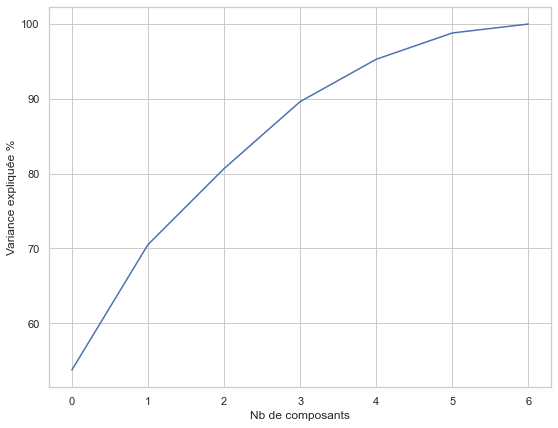

In [23]:
plt.figure(figsize=(9, 7))
plt.plot(np.cumsum(df_pca.explained_variance_ratio_*100))
plt.xlabel('Nb de composants')
plt.ylabel('Variance expliquée %')

#### Eboulis des valeurs propres

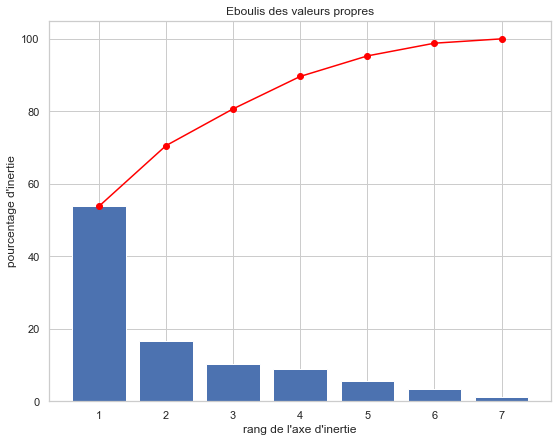

In [24]:
X_projected = X_df_pca
scree = df_pca.explained_variance_ratio_*100
plt.figure(figsize=(9, 7))
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

# 
On remarque ici que l'inertie totale sur le premier plan factoriel (F1 et F2) est égale à 70 % (53.80 + 16.80). Une analyse sur ce premier plan factoriel serait donc satisfaisante.

#### Cercle des corrélations 

In [25]:
pcas = decomposition.PCA(svd_solver='full')
pcas.fit(X_scaled)

PCA(svd_solver='full')

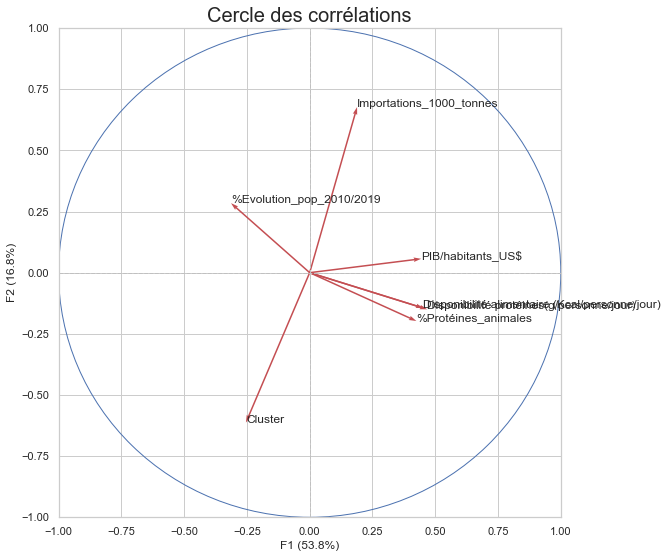

In [26]:
pcs = pcas.components_

fig = plt.subplots(figsize=(9,9))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
           pcs[0,:], pcs[1,:], 
           angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, main_df.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations', fontsize=20)
plt.xlabel('F{} ({}%)'.format(1, round(100*pcas.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pcas.explained_variance_ratio_[1],1)))



plt.show()

Les variables les plus corrélées à F1 sont la disponibilité protéines (g/personne/jour), la disponibilité en calories ainsi que le ratio protéines animales/protéines totales (les trois variables sont fortement corrélées entre elles). Pour F2 la variable corrélée est l'évolution de la population entre 2010 et 2019. 
- La composante principale F1 représente le bilan énergétique.
- La composante principale F2 réprésente les données démographiques. 

### 5. Application de l'algorithme K-Means
Nous allons maintenant réaliser un clustering K-Means pour plusieurs tailles de clusters, et pour chacune de ces tailles nous allons calculer le coefficient de silhouette, puis l'inertie pour pouvoir ensuite choisir la taille de cluster la plus appropriée.

In [28]:
#Préparation des données
X = main_df.values
#Centrage et réduction des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

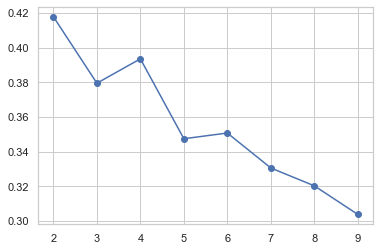

In [29]:
silhouettes = [] 

#Boucle itérative de 2 à 10 (clusters) pour tester les possibilités
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = cluster.KMeans(n_clusters=k)  
    cls.fit(X_scaled)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.show()

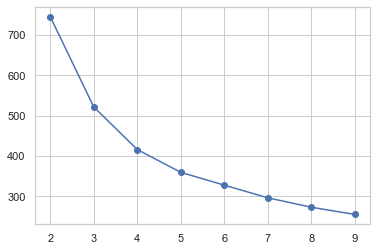

In [30]:
#On crée une liste dans laquelle on stocke les inerties
inerties=[]

#On fait une boucle de 2 à 9 pour tester toutes les possibilités
for k in range(2, 10):
    #pour chaque k, on crée un modèle et on l’ajuste
    km = cluster.KMeans(n_clusters=k)
    km.fit(X_scaled)
    #on stocke l’inertie associée
    inerties.append(km.inertia_)

#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(2, 10), inerties, marker='o')
plt.show()

# 
On remarque que le nombre de 5 clusters n'est pas idéal, il faudrait idéalement privilégier un k=2.

Cependant, afin d'avoir un meilleur partionnement et une liste de pays plus courte est donc exploitable, il convient de considérer un k=3 ou k=4 (confirmé par le coefficient de silhouette).

### 6. Sélections des pays sur clusters Kmeans (k=4)

In [31]:
#Clustering K-Means en 4 clusters
cls4 = cluster.KMeans(n_clusters=4)
cls4.fit(X_scaled)

KMeans(n_clusters=4)

In [32]:
clusters_kmeans4 = cls4.labels_

In [33]:
#Tableau des centroïdes (4 clusters) dans sa version centrée réduite
centroids = cls4.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns=main_df.columns)
df_centroids.to_csv("df_centroids.csv", index = False)
df_centroids

,%Evolution_pop_2010/2019,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité protéines(g/personne/jour),%Protéines_animales,PIB/habitants_US$,Importations_1000_tonnes,Cluster
0,1.074895,-1.041197,-1.005972,-0.963048,-0.777684,-0.235605,-0.273499
1,-0.751802,1.184525,1.224326,1.025392,1.351193,-0.011032,-1.196107
2,-0.311395,0.063966,0.012141,0.097892,-0.213259,-0.203277,0.937554
3,-0.694849,0.909527,1.009913,0.780928,1.122473,4.107259,-2.053971


In [34]:
#Index trié des clusters
idk = np.argsort(cls4.labels_)

#Affichage des observations selon leurs clusters
df_cls4 = pd.DataFrame(main_df.index[idk], cls4.labels_[idk]).reset_index()
df_cls4 = df_cls4.rename(columns={'index':'cluster_km'})

In [35]:
#Intégration des clusters dans "df_cls4" et jointure avec le dataframe initial
df_cls4 = pd.merge(main_df, df_cls4, on='Pays')
df_cls4.head()

,Pays,%Evolution_pop_2010/2019,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité protéines(g/personne/jour),%Protéines_animales,PIB/habitants_US$,Importations_1000_tonnes,Cluster,cluster_km
0,Arménie,2.82,3019.0,94.28,56.0,13653.8,43.0,4,2
1,Afghanistan,30.34,2271.0,57.29,18.0,2065.0,44.0,3,0
2,Albanie,-2.27,3334.0,115.98,54.0,13671.5,22.0,2,1
3,Algérie,19.67,3490.0,90.82,27.0,11510.6,0.0,5,2
4,Angola,36.26,2441.0,52.07,30.0,6670.3,278.0,3,0


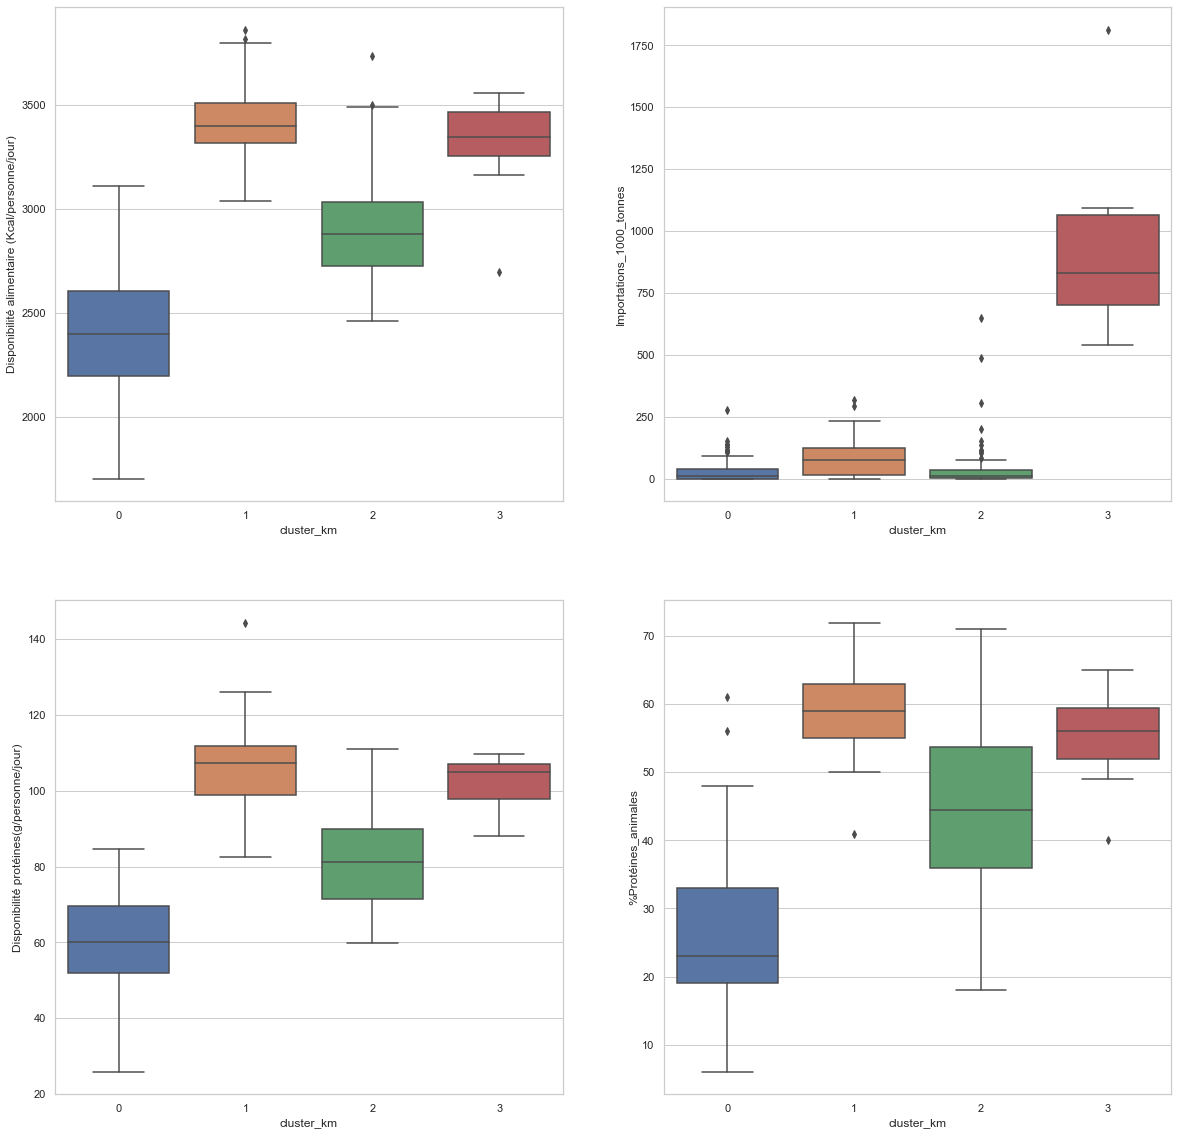

In [36]:
# Visualisation des groupes 
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")


plt.subplot(221)
sns.boxplot(data=df_cls4, x='cluster_km', y='Disponibilité alimentaire (Kcal/personne/jour)')

plt.subplot(222)
sns.boxplot(data=df_cls4, x='cluster_km', y='Importations_1000_tonnes')

plt.subplot(223)
sns.boxplot(data=df_cls4, x='cluster_km', y='Disponibilité protéines(g/personne/jour)')

plt.subplot(224)
sns.boxplot(data=df_cls4, x='cluster_km', y='%Protéines_animales')

plt.show(block=False)

In [37]:
print(df_cls4[df_cls4['cluster_km'] == 1]['Pays'].unique())
print(df_cls4[df_cls4['cluster_km'] == 3]['Pays'].unique())

['Albanie' 'Argentine' 'Australie' 'Autriche' 'Canada' 'Cuba' 'Chypre'
 'Danemark' 'Estonie' 'Finlande' 'Grèce' 'Hongrie' 'Croatie' 'Islande'
 'Irlande' 'Israël' 'Italie' 'Kazakhstan' 'République de Corée' 'Lettonie'
 'Lituanie' 'Malte' 'Nouvelle-Zélande' 'Norvège' 'Tchéquie' 'Pologne'
 'Portugal' 'Roumanie' 'Fédération de Russie' 'Slovénie' 'Espagne' 'Suède'
 'Suisse' "États-Unis d'Amérique" 'Belgique' 'Luxembourg' 'Monténégro']
['France' 'Allemagne' 'Japon' 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord" 'Chine']


In [38]:
df_cls4_subset = df_cls4.query('[1, 3] in cluster_km')
df_cls4_subset.shape

(44, 9)

#### Comparaison des pays obtenus sur les 2 méthodes (CAH, KM)

In [39]:
main_cah = main_df_subset[['Cluster']].reset_index()

In [40]:
df_comparaison = pd.merge(df_cls4_subset[['Pays', 'cluster_km']], main_cah[['Pays', 'Cluster']],
                     on='Pays', how='outer')
liste_verif = df_comparaison.loc[((df_comparaison['cluster_km'].isnull() == True) | (df_comparaison['Cluster'].isnull() == True)),'Pays'].to_list()
print(liste_verif)

[]


# 
Suite à la comparaison des deux méhtodes, on constate que nos deux listes de pays sont identiques. Les clusters sont stables peu importe le procédé. 
Cette liste est donc pertinente 

In [41]:
main_df_subset.to_csv('main_df_subset', index=True)